In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/cleaned.csv')


In [367]:
X = df[[
#    'user_id',
    'card_method',
    'mcc_group',
#    'amount',
#    'card_limit',
#    'card_type',
#    'user_age',
#    'user_gender',
#    'user_rating',
    'user_number_of_cards',
    'city_match',
    'state_match',
#    'insuf_balance',
#    'bad_pin',
#    'bad_cvv',
#    'bad_card_number',
#    'bad_expir',
#    'bad_zip',
#   'tech_glitch',
]]

X['error'] = df[
    ['insuf_balance', 'bad_pin', 'bad_cvv', 'bad_card_number', 'bad_expir', 'bad_zip']
    ].apply(lambda row : any(row))

X = pd.get_dummies(X)

y = df['flagged_as_fraud']

X.columns

Index(['user_id', 'user_number_of_cards', 'city_match', 'state_match',
       'card_method_Chip Transaction', 'card_method_Online Transaction',
       'card_method_Swipe Transaction', 'mcc_group_Business services',
       'mcc_group_Clothing stores', 'mcc_group_Contracted services',
       'mcc_group_Government services', 'mcc_group_Miscellaneous stores',
       'mcc_group_Professional services and membership organizations',
       'mcc_group_Retail outlet services', 'mcc_group_Transportation services',
       'mcc_group_Unknown', 'mcc_group_Utility services'],
      dtype='object')

In [368]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [369]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression().fit(xtrain,ytrain)


In [370]:
test_prediction = model.predict(xtest)

print('Accuracy Score: ', accuracy_score(ytest, test_prediction))

Accuracy Score:  0.8691860465116279


In [371]:
print('Confusion Matrix:')
print(confusion_matrix(ytest, test_prediction))

Confusion Matrix:
[[12702  1319]
 [ 1291  4640]]


<Axes: ylabel='feature'>

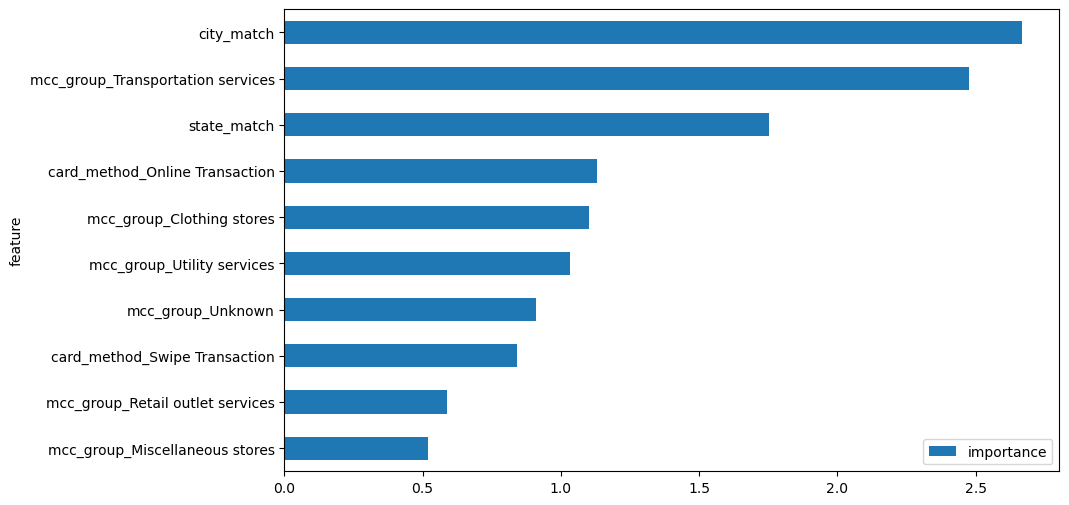

In [372]:
# Assessing importance
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(10)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(10, 6))

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_features='auto', 
    min_samples_leaf=10
).fit(xtrain, ytrain)

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(ytest, ypred))

KeyboardInterrupt: 